In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [3]:
g = 6.673e-11 # Gravitional Constant
Rho = 2000
R = 100
iterasi = 25
V = 3.14 * R**3 # Volume
Rho_est = random.sample(range(1000, 3000),iterasi) #Mc Sample untuk rho
Z_est = random.sample(range(100, 500),iterasi) #Mc Sample untuk kedalaman
X_est = random.sample(range(100, 750),iterasi) #Mc Sample untuk x
print('Nilai Rho Random',Rho_est)
print('Nilai Z random', Z_est)
print('Nilai x random', X_est)

Nilai Rho Random [1318, 1082, 2992, 2381, 1385, 2748, 2477, 2989, 1347, 1534, 1133, 2623, 1283, 2594, 1809, 2765, 2617, 2550, 1113, 2549, 1190, 1257, 2339, 2584, 1827]
Nilai Z random [259, 298, 474, 336, 228, 432, 243, 330, 269, 267, 392, 247, 461, 208, 472, 212, 116, 391, 475, 429, 273, 240, 435, 237, 170]
Nilai x random [739, 457, 241, 275, 740, 529, 135, 130, 723, 519, 144, 394, 623, 399, 235, 719, 663, 172, 643, 429, 628, 327, 525, 191, 685]


In [4]:
#  Luas Daerah Pengamatan
panjanglintasan = 1500
kedalaman = 500
space = 20
xo = np.arange(0, panjanglintasan, space)
print(len(xo))
zo = np.zeros(len(xo))
# print(zo)
y = np.arange(10, kedalaman, space)
x = 750
z = 300

# ======================================================

gobs = (10 ** 5) * g * V* Rho * (z - zo)/(((x - xo) ** 2 + (z - zo) ** 2) ** (3/2)) # Nilai G Observasi

Gobs = gobs + np.random.randint(0,1.9,len(gobs))
print(gobs)

75
[0.02385235 0.02557258 0.02745445 0.02951633 0.03177896 0.03426583
 0.03700346 0.04002193 0.04335529 0.04704212 0.05112608 0.05565661
 0.06068954 0.06628782 0.0725222  0.07947183 0.08722479 0.09587823
 0.10553824 0.1163189  0.12834047 0.1417261  0.15659665 0.17306286
 0.19121431 0.21110439 0.2327307  0.25601114 0.28075622 0.30664031
 0.33317564 0.35969588 0.38535714 0.40916503 0.43003391 0.44687846
 0.458729   0.46485214 0.46485214 0.458729   0.44687846 0.43003391
 0.40916503 0.38535714 0.35969588 0.33317564 0.30664031 0.28075622
 0.25601114 0.2327307  0.21110439 0.19121431 0.17306286 0.15659665
 0.1417261  0.12834047 0.1163189  0.10553824 0.09587823 0.08722479
 0.07947183 0.0725222  0.06628782 0.06068954 0.05565661 0.05112608
 0.04704212 0.04335529 0.04002193 0.03700346 0.03426583 0.03177896
 0.02951633 0.02745445 0.02557258]


In [5]:
# Pemodelan Inversi

error = np.infty
it = 0

for i in range (len(Rho_est)) :
    it = it + 1 # Banyaknya iterasi
    gcal = (10 ** 5) * g * V * Rho_est[i] * (Z_est[i]-zo)/ ((X_est[i]-xo) ** 2 + (Z_est[i]-zo) ** 2) ** (3/2) # Nilai G Kalkulasi
    E=[]
    E.append((gcal-gobs)**2)
    rms = (np.sqrt(np.mean(E))) # Error Estimasi
    if error > rms:
        error = rms
        rho_est = Rho_est[i]
        z_est = Z_est[i]
        x_est = X_est[i]
    gcal = (10 ** 5) * g * V * rho_est * (z_est - zo) / ((x_est - xo) ** 2 + (z_est - zo) ** 2) ** (3 / 2)

    print('-' * 50)
    print('Iterasi Ke -',it)
    print('rho calculasi :',rho_est)
    print('Nilai Z estimasi :',z_est)
    print('Nilai X estimasi :',x_est)
    print('rms error :',rms)
    print('nilai error :',error)

--------------------------------------------------
Iterasi Ke - 1
rho calculasi : 1318
Nilai Z estimasi : 259
Nilai X estimasi : 739
rms error : 0.044143021375349936
nilai error : 0.044143021375349936
--------------------------------------------------
Iterasi Ke - 2
rho calculasi : 1318
Nilai Z estimasi : 259
Nilai X estimasi : 739
rms error : 0.17005871261728173
nilai error : 0.044143021375349936
--------------------------------------------------
Iterasi Ke - 3
rho calculasi : 1318
Nilai Z estimasi : 259
Nilai X estimasi : 739
rms error : 0.19609266212414767
nilai error : 0.044143021375349936
--------------------------------------------------
Iterasi Ke - 4
rho calculasi : 1318
Nilai Z estimasi : 259
Nilai X estimasi : 739
rms error : 0.23535231276971047
nilai error : 0.044143021375349936
--------------------------------------------------
Iterasi Ke - 5
rho calculasi : 1385
Nilai Z estimasi : 228
Nilai X estimasi : 740
rms error : 0.03733761282488048
nilai error : 0.03733761282488048


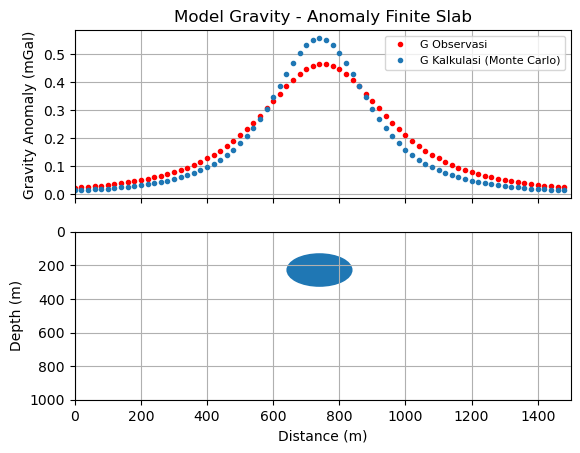

In [13]:
# FS = np.zeros(shape=(len(zo), len(xo)))
# FS[40:50, 25:50] = rho_est # letak anomali dari hasil inversi
FS2 = np.zeros(shape=(len(zo), len(xo)))
FS2[30:45, 25:50] = rho_est  # letak anomali dari hasil inversi

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(xo, Gobs, "r.", label='G Observasi')
ax1.plot(xo, gcal, '.', label='G Kalkulasi (Monte Carlo)')
ax1.legend(loc=1, prop={'size': 8})
ax1.grid()
ax1.set_ylabel("Gravity Anomaly (mGal)")
ax1.set_title("Model Gravity - Anomaly Finite Slab")

# ax2.imshow(FS, aspect='auto', extent=[min(xo), max(xo), max(y), min(y)], cmap="Greys")
circle = plt.Circle((x_est,z_est),radius=R)
ax2.set(xlim=(0,1500),ylim=(0,1000))
ax2.add_patch(circle)
ax2.set_ylabel("Z (m)")
ax2.set_xlabel("X (m)")
ax2.invert_yaxis()
ax2.set_xlabel("Distance (m)")
ax2.set_ylabel("Depth (m)")
ax2.grid()
plt.show()


In [14]:
print(E)

[array([2.85296761e-05, 2.96770614e-05, 3.05365870e-05, 3.09864631e-05,
       3.08795317e-05, 3.00455017e-05, 2.83002354e-05, 2.54682846e-05,
       2.14294021e-05, 1.62074234e-05, 1.01328898e-05, 4.13270750e-06,
       2.37182631e-07, 2.45733280e-06, 1.82909296e-05, 6.12934625e-05,
       1.55448301e-04, 3.42566743e-04, 6.94765490e-04, 1.33538692e-03,
       2.47378488e-03, 4.46243322e-03, 7.88883275e-03, 1.37188121e-02,
       2.35086631e-02, 3.96919310e-02, 6.59021232e-02, 1.07178812e-01,
       1.69680804e-01, 2.59219020e-01, 3.77789272e-01, 5.18052719e-01,
       6.58225318e-01, 7.63209314e-01, 7.97216236e-01, 7.43771806e-01,
       6.17673683e-01, 4.57020469e-01, 3.02075944e-01, 1.78439520e-01,
       9.35336555e-02, 4.24848474e-02, 1.57086170e-02, 3.93850418e-03,
       2.62106513e-04, 2.93144973e-04, 1.59387398e-03, 2.98924522e-03,
       4.02368930e-03, 4.60348051e-03, 4.78901972e-03, 4.68694381e-03,
       4.40104303e-03, 4.01446356e-03, 3.58681537e-03, 3.15731614e-03,
     